In [57]:
library(repr)
library(mice)
library(dplyr)
library(Rmisc)
library(ggplot2)
df = read.csv('cleaned.csv')

In [58]:
df

X,Name,Studio,Episodes,Genres,Source,Type,Score,Members,Season,Year
0,Patalliro!,Toei Animation,49,"[Adventure, Comedy, Romance, Shoujo, Shounen Ai]",Manga,TV,7.620000,"2,748",Spring,1982
1,Mahou no Princess Minky Momo,Production Reed,63,"[Magic, Shoujo]",Original,TV,6.770000,"2,524",Spring,1982
2,Kikou Kantai Dairugger XV,Toei Animation,52,"[Action, Adventure, Mecha, Sci-Fi, Shounen]",-,TV,6.560000,"1,228",Spring,1982
3,Ochamegami Monogatari: Korokoro Pollon,-,46,"[Parody, Magic, Comedy]",Manga,TV,7.130000,"1,169",Spring,1982
4,Tezuka Osamu no Don Dracula,-,8,"[Comedy, Horror, Supernatural, Vampire]",Manga,TV,6.380000,"1,057",Spring,1982
5,Tondera House no Daibouken,Tatsunoko Production,52,"[Adventure, Historical, Sci-Fi]",Original,TV,6.500000,681,Spring,1982
6,Kagaku Kyuujo-tai TechnoVoyager,Toei Animation,18,"[Action, Adventure, Mecha, Sci-Fi, Space]",-,TV,6.440000,432,Spring,1982
7,Makyou Densetsu Acrobunch,-,24,"[Mecha, Sci-Fi, Shounen]",-,TV,6.470000,352,Spring,1982
8,Anime Yasei no Sakebi,-,22,"[Adventure, Drama]",-,TV,6.885134,206,Spring,1982
9,Haguregumo,"Madhouse, Toei Animation",1,"[Comedy, Historical, Seinen]",-,Movie,6.885134,252,Spring,1982


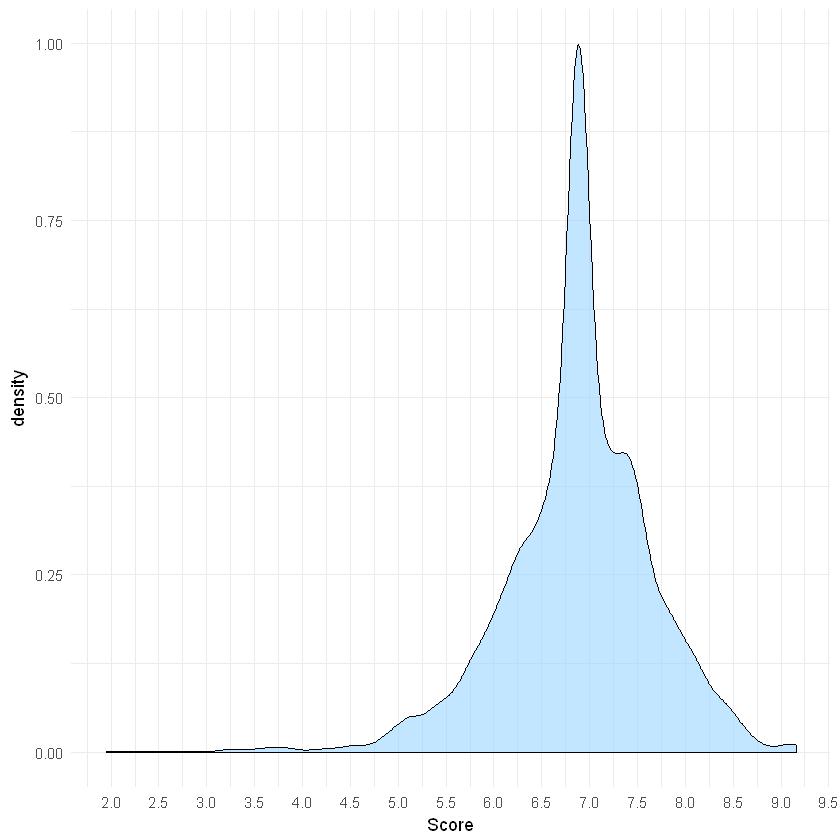

In [59]:
ggplot(df,aes(x=Score)) + geom_density(fill='#99d6ff',alpha=.6)+scale_x_continuous(breaks=seq(1,10,1/2))+theme_minimal()

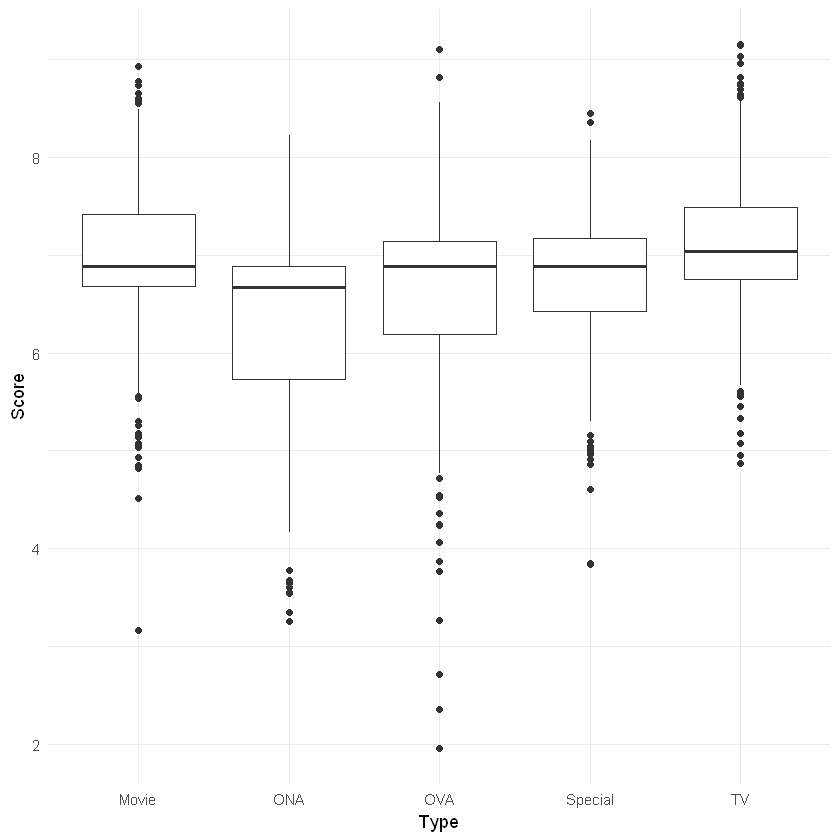

In [60]:
ggplot(df, aes(x=Type,y=Score))+geom_boxplot()+theme_minimal()

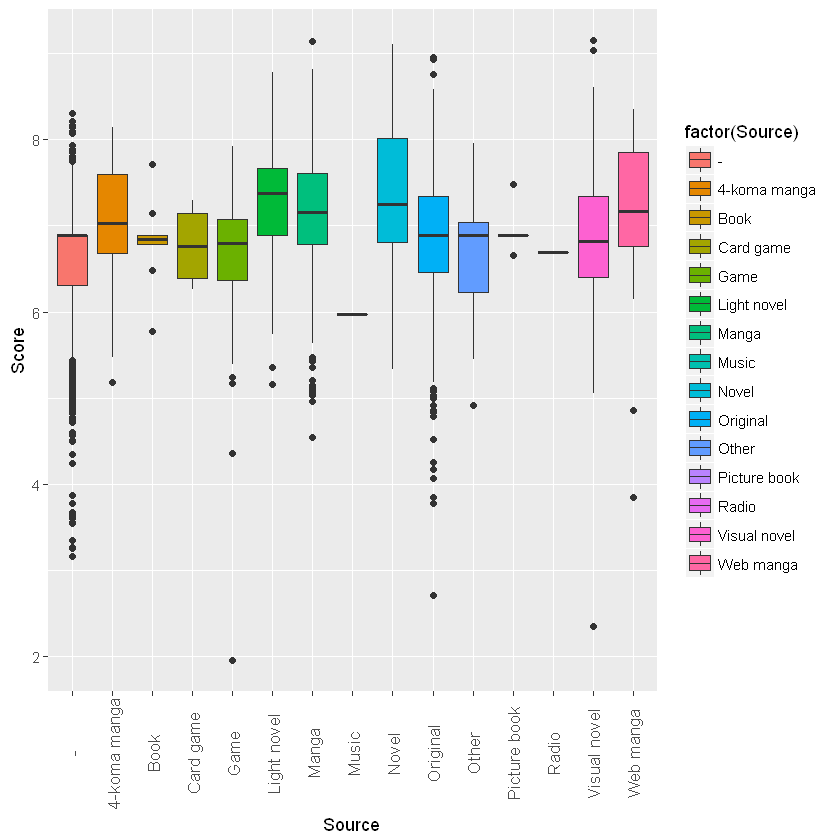

In [61]:
ggplot(df,aes(x=Source,y=Score,fill=factor(Source))) + geom_boxplot()+theme(axis.text.x=element_text(angle=90, size=10, vjust=0.5))

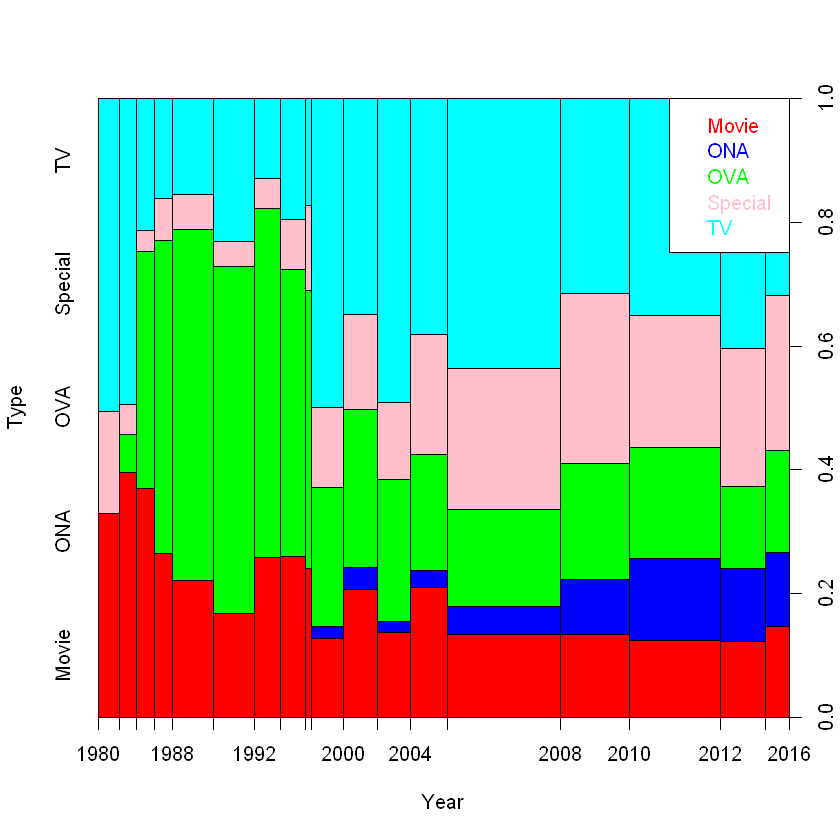

In [62]:
plot(Type~Year,df,col=c('red','blue','green','pink','cyan') )
legend('topright',c('Movie','ONA','OVA','Special','TV'),text.col=c('red','blue','green','pink','cyan'))

In [63]:
names(df)
is.na(df) <- df=="-"

[1] "X"        "Name"     "Studio"   "Episodes" "Genres"   "Source"  
 [7] "Type"     "Score"    "Members"  "Season"   "Year"

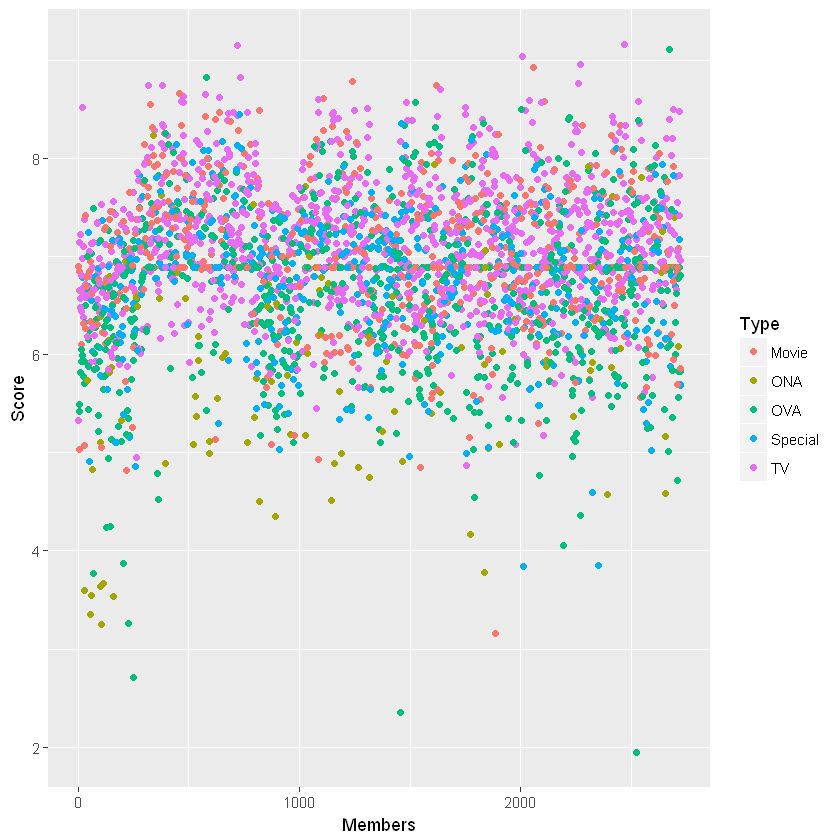

In [8]:
members <-factor(x =df$Members )
df$Members <- as.numeric(x = members)
ggplot(df,aes(x=Members,y=Score,color=Type)) +geom_point() + scale_x_continuous()

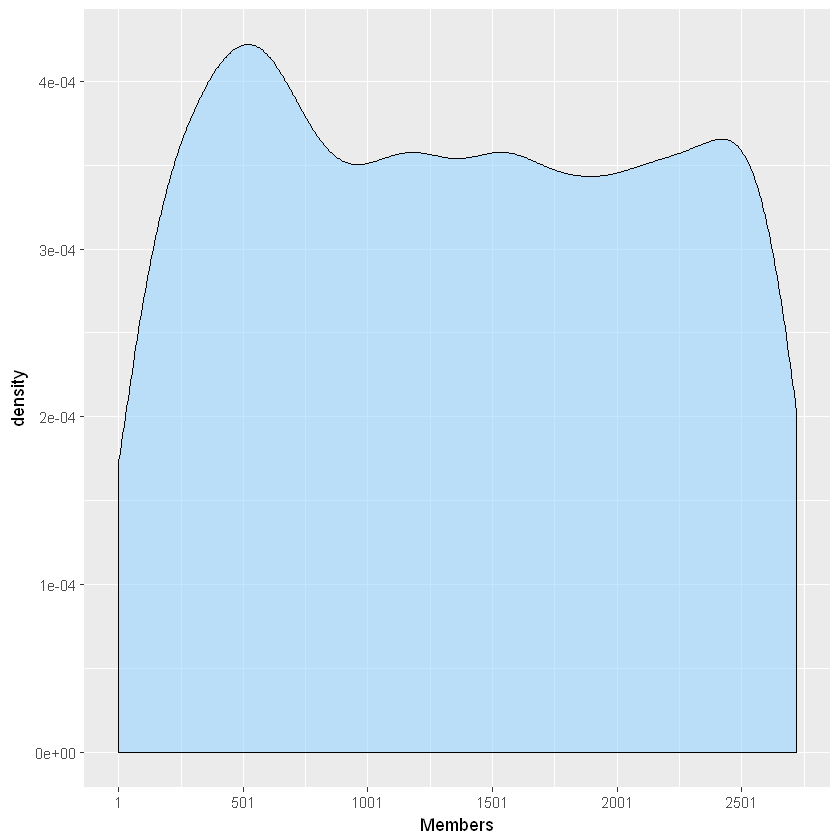

In [9]:
ggplot(df,aes(x=Members)) + geom_density(fill='#99d6ff',alpha=.6)+scale_x_continuous(breaks=seq(1,3000,500))

`geom_smooth()` using method = 'gam'


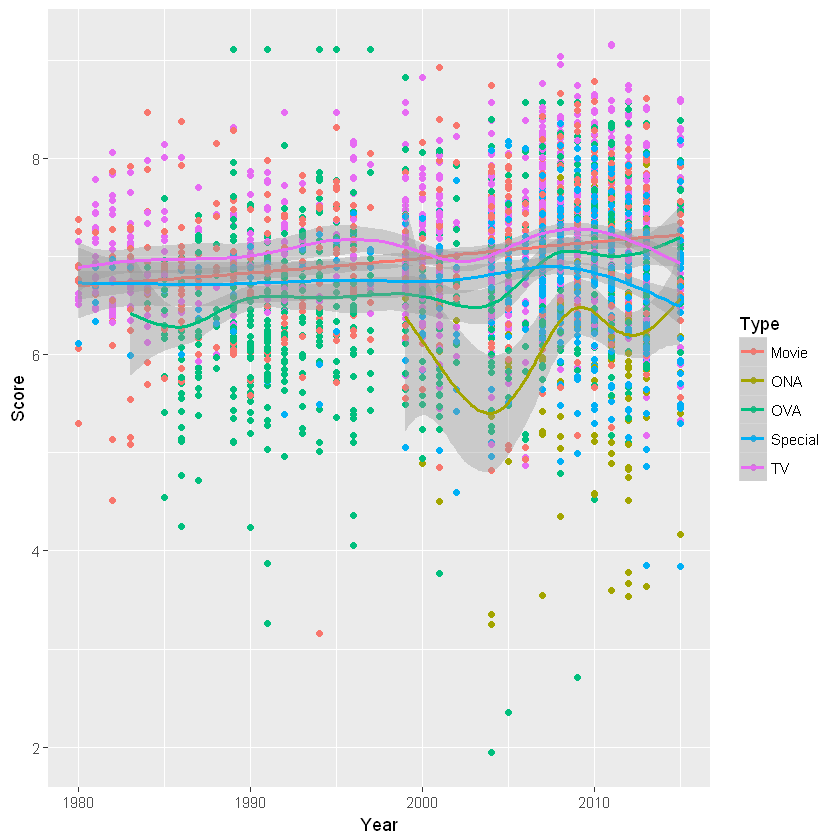

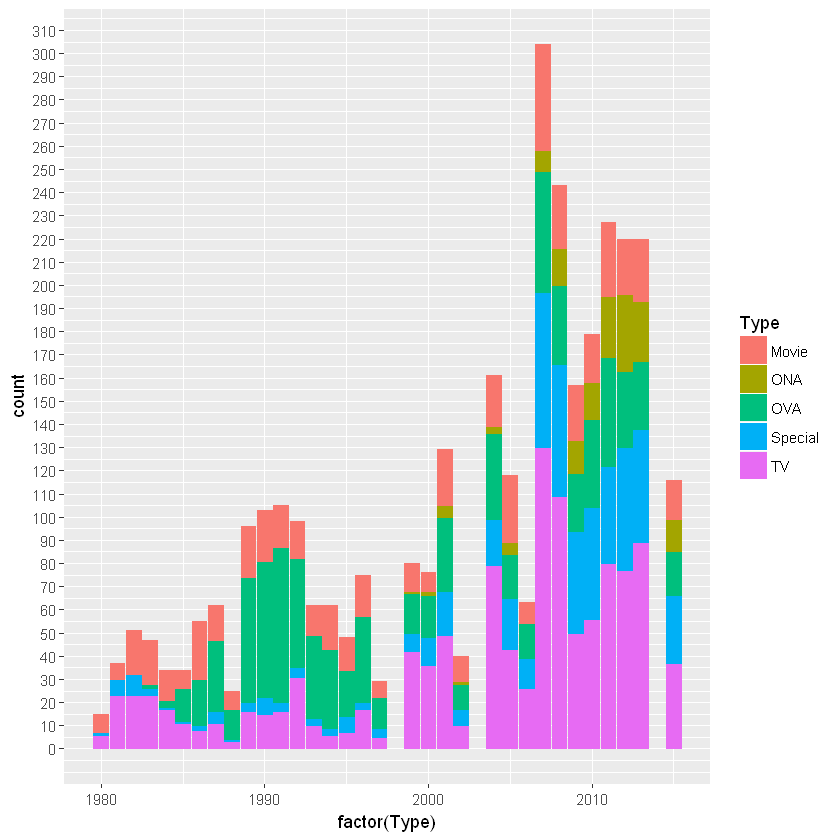

In [10]:
ggplot(df,aes(x=Year,Score,color=Type))+geom_point()+geom_smooth()
ggplot(df,aes(x=factor(Type),y=..count..,fill=Type))+geom_bar(mapping = aes(df$Year,color=Type))+scale_y_continuous(breaks = seq(0,400,10))

In [33]:
fit <-lm(Score~Year,df,)

In [53]:
summary(fit)


Call:
lm(formula = Score ~ Year, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9525 -0.3617  0.0645  0.4406  2.3633 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.90648    2.72277  -5.107 3.45e-07 ***
Year          0.01038    0.00136   7.636 2.89e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7554 on 3369 degrees of freedom
Multiple R-squared:  0.01701,	Adjusted R-squared:  0.01672 
F-statistic: 58.31 on 1 and 3369 DF,  p-value: 2.894e-14


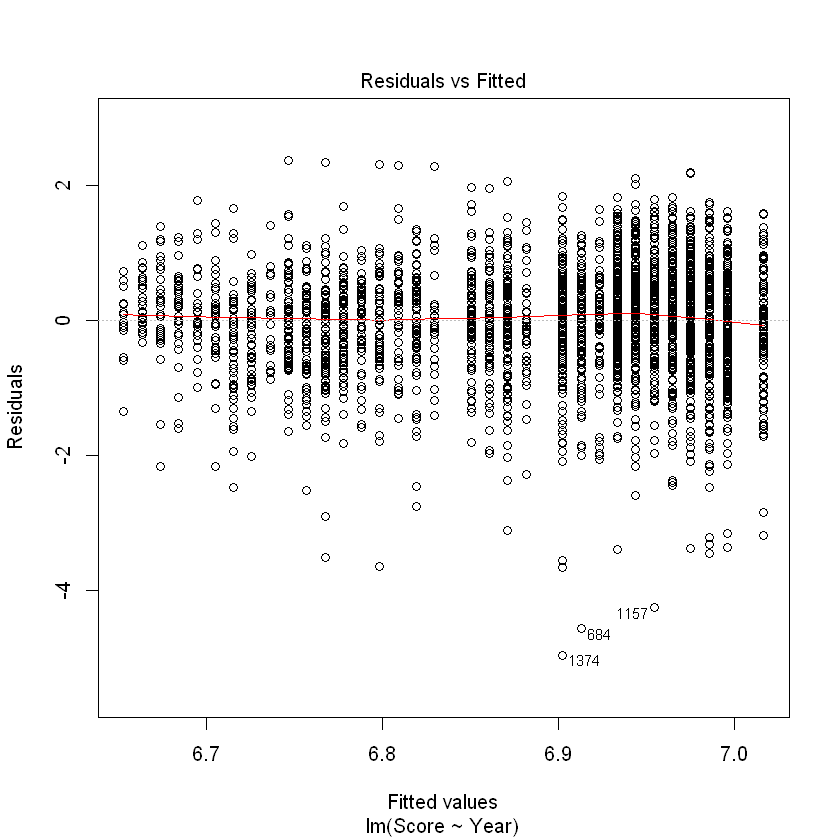

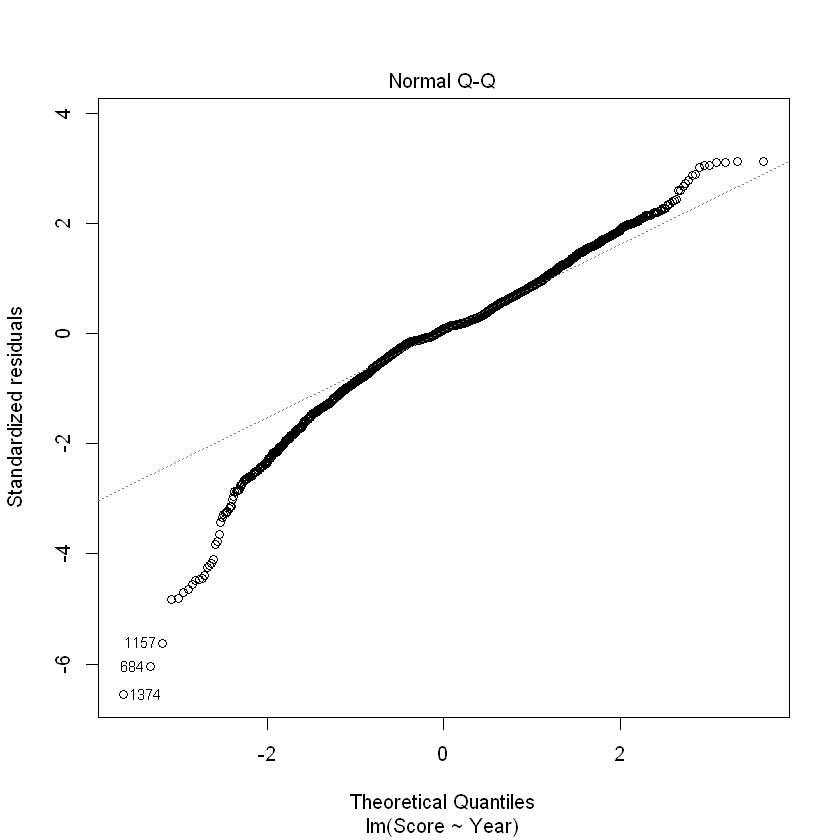

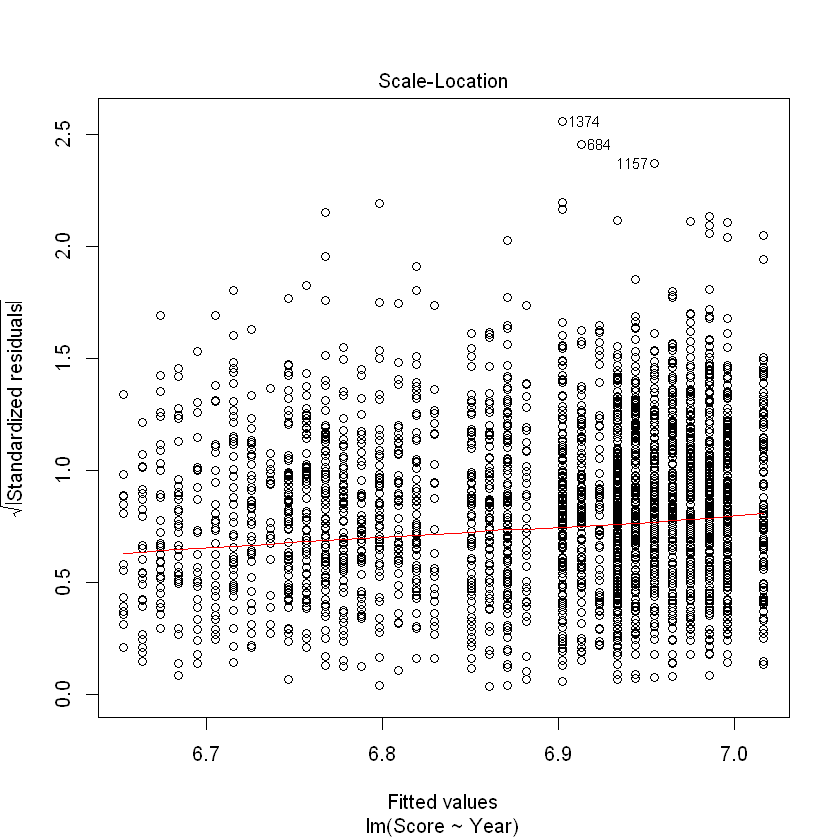

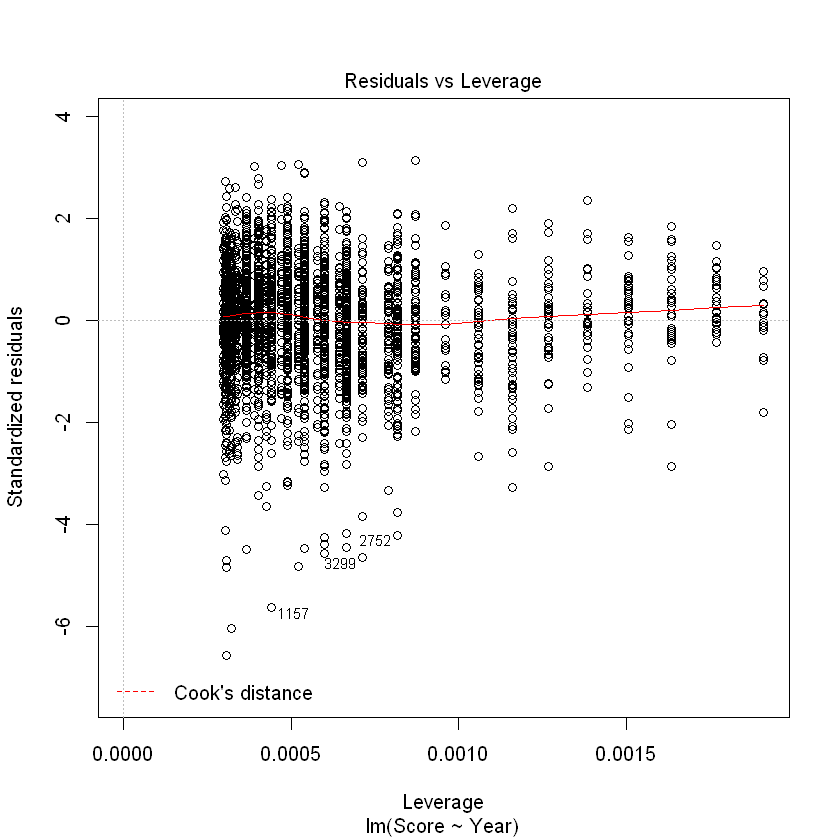

In [64]:
plot(fit)

In [65]:
df$Members

[1] 2,748     2,524     1,228     1,169     1,057     681       432      
   [8] 352       206       252       229       223       210       85       
  [15] 9,322     5,382     1,842     16,824    15,218    13,422    6,845    
  [22] 5,437     3,984     3,899     3,373     1,954     1,791     1,082    
  [29] 851       516       180       126       25        24,001    13,468   
  [36] 1,227     776       771       342       96        95        88       
  [43] 3,733     1,134     967       26,621    2,795     2,482     2,405    
  [50] 2,048     1,380     1,042     1,014     982       439       355      
  [57] 95        501       150       69        67        962       283      
  [64] 151       107       106       8,297     5,639     2,511     1,879    
  [71] 397       90        84        18,405    449       446       413      
  [78] 373       283       179       101       21        654       612,445  
  [85] 172,225   149,132   49,919    46,487    45,816    36,044    32,456   
  [92] 29,762    21,856    20,557    10,792    7,654     7,017     6,291    
  [99] 5,976     5,070     5,063     4,056     3,548     1,660     1,204    
 [106] 16,437    3,823     41,252    19,054    15,976    15,661    12,082   
 [113] 8,162     7,337     5,160     5,072     4,931     4,027     2,568    
 [120] 1,223     273       371,277   34,195    10,670    10,494    9,577    
 [127] 3,131     1,791     643       447       427       206       133      
 [134] 79        35,176    34,815    18,513    17,774    4,778     3,696    
 [141] 3,627     3,500     1,075     676       61        88,674    56,139   
 [148] 42,290    30,128    20,353    9,664     6,288     5,663     1,709    
 [155] 1,262     545       149       130       89        16,824    9,322    
 [162] 7,159     7,031     6,101     4,766     3,899     2,538     1,763    
 [169] 1,723     1,554     1,451     1,406     1,054     965       642      
 [176] 475       461       359       73        65        14,959    9,579    
 [183] 4,685     1,634     896       669       282       243       83       
 [190] 780,360   686,214   530,432   511,747   292,089   211,334   189,281  
 [197] 172,515   171,011   166,973   163,021   113,006   111,033   106,360  
 [204] 105,062   93,212    79,930    70,727    63,079    62,819    60,326   
 [211] 56,390    46,045    42,765    34,656    29,898    28,951    25,690   
 [218] 21,605    16,655    16,518    16,484    13,711    12,310    11,589   
 [225] 10,297    7,221     5,837     5,268     3,802     2,317     2,109    
 [232] 1,761     832       658       621       597       526       441      
 [239] 296       269       211       197       194       189       181      
 [246] 134       128       110,639   96,361    14,010    12,916    9,723    
 [253] 2,864     1,282     1,062     982       135       114       113      
 [260] 113       152,753   141,105   118,663   91,515    80,334    68,944   
 [267] 61,972    45,549    33,703    27,759    26,442    21,031    10,442   
 [274] 9,835     8,793     6,588     5,769     1,817     65        88,445   
 [281] 76,979    36,528    19,399    19,160    8,320     5,245     2,904    
 [288] 2,677     1,872     1,007     920       876       310       132      
 [295] 57,925    48,706    40,581    33,726    25,350    21,352    16,264   
 [302] 15,288    13,402    11,266    11,012    6,238     5,204     4,153    
 [309] 3,499     3,026     2,918     1,876     431       6,508     6,069    
 [316] 2,825     2,610     2,056     1,150     1,085     1,080     528      
 [323] 325       141       1,578     320       86        370       190      
 [330] 7,561     6,211     5,188     2,336     759       182       6,472    
 [337] 3,918     2,977     2,627     2,065     1,929     1,409     1,378    
 [344] 994       783       588       449       298       268       193      
 [351] 143       143       137       134       130       129       107      
 [358] 104       57,604    3,798     424       374       247       124      

In [75]:
df$Members <- as.numeric(df$Members)
df$Year <- as.numeric(df$Year)

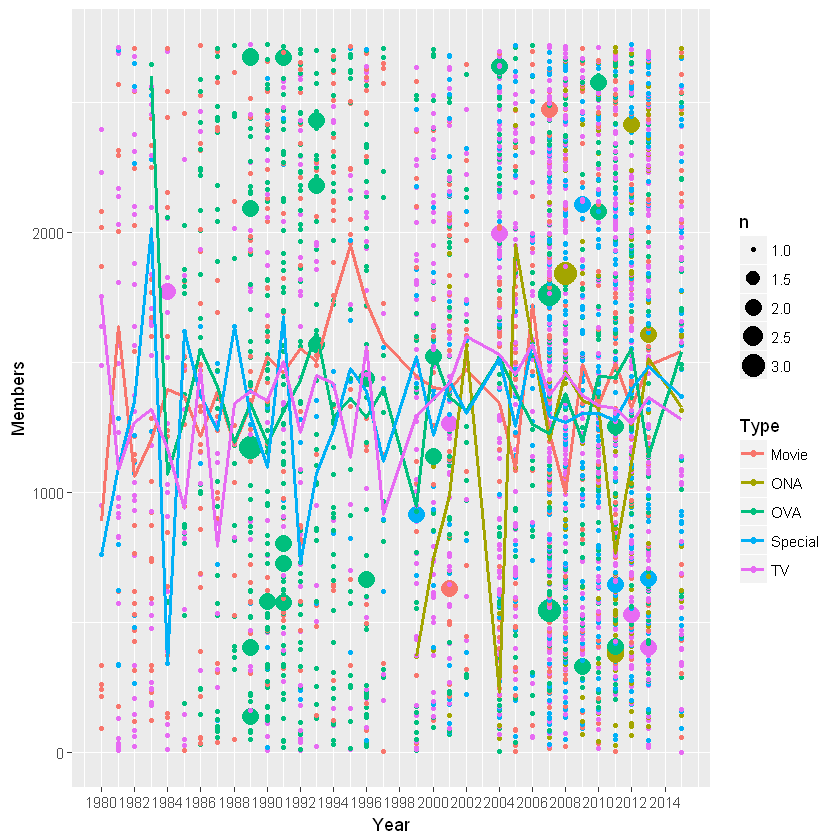

In [140]:
ggplot(df,aes(Year,Members,color=Type))+geom_count()+stat_summary(fun.y=mean,geom='smooth',na.rm = F)+scale_x_continuous(breaks = seq(min(df$Year),max(df$Year),2))